In [2]:
#Imports 
from qiskit import *
from matplotlib import *
from qiskit.visualization import plot_histogram
import qiskit.tools.jupyter
from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import PhaseOracle
from qiskit.algorithms import Grover, AmplificationProblem, Shor

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


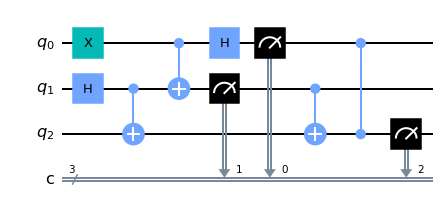

In [7]:
#Teleportation Circuit
#A teleportation circuit in Qiskit is a quantum circuit that allows for the transfer of quantum information 
#from one location to another without physically moving the information. It works by using a shared entangled 
#state and classical communication to transmit the information.
circuit = QuantumCircuit(3, 3) 
circuit.x(0)
circuit.h(1)
circuit.cx(1, 2) 
circuit.cx(0, 1) 
circuit.h(0)
circuit.measure([0], [0])
circuit.measure([1], [1])
circuit.cx(1, 2) 
circuit.cz(2, 0) 
circuit.measure([2], [2])
circuit.draw(output="mpl")

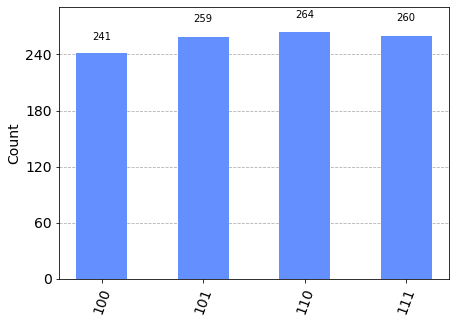

In [8]:
simulator = Aer.get_backend("qasm_simulator") 
result = execute(circuit, backend=simulator, shots = 1024).result()
plot_histogram(result.get_counts(circuit))

In [19]:
#The q1 qubit has been teloprted to q3 and as you can see, all the values
#have 1 in their q3 which is what we set the value of q1 to by adding a not gate
print({key[0] for key in result.get_counts(circuit).keys()})

{'1'}


In [5]:
#This Circuit returns the number reads and writes the number you input and demonstrates how
#quantum computer can do this in 1 shot opposed to n shots a classical computer would take
#(n is th lenght of number)
secretNum = input("Enter your Binary Number")
circuit = QuantumCircuit(len(secretNum) + 1, len(secretNum))
circuit.h(range(len(secretNum)))
circuit.x(len(secretNum))
circuit.h(len(secretNum))
circuit.barrier()
for index, digit in enumerate(secretNum[::-1]):
    if digit == "1":
        circuit.cx(index, len(secretNum))
circuit.barrier()
circuit.h(range(len(secretNum)))
circuit.measure(range(len(secretNum)), range(len(secretNum)))
simulator = Aer.get_backend("qasm_simulator") 
result = execute(circuit, backend=simulator, shots = 1).result() 

#Result
print("Your Number : " + str(list(result.get_counts(circuit).keys())[0]))

Enter your Binary Number 10101001


Your Number : 10101001


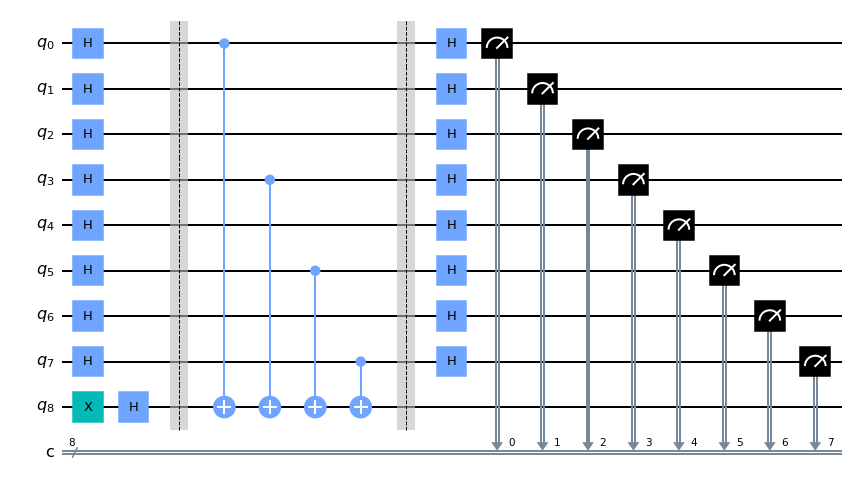

In [6]:
circuit.draw(output='mpl')

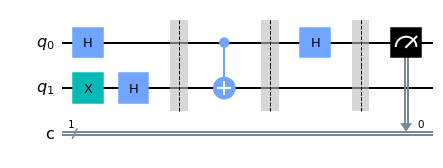

In [10]:
#Deutsch Algorithm
#The Deutsch algorithm is a quantum algorithm that can determine the parity (even or odd) of a 
#function with a single evaluation, rather than the two evaluations required classically. 
#It is implemented in Qiskit by constructing a quantum circuit that applies the function to be evaluated 
#to a fixed input state and then measuring the output state to determine the parity of the function. 
#This particular one determins if a function is constant or balanced. We have entered a constant function
#and it should return 1
circuit = QuantumCircuit(2,1)
circuit.h(0)
circuit.x(1)
circuit.h(1)
circuit.barrier()
circuit.cx(0,1)
circuit.barrier()
circuit.h(0)
circuit.barrier()
circuit.measure(0,0)
circuit.draw(output='mpl')

In [11]:
simulator = Aer.get_backend("qasm_simulator") 
result = execute(circuit, backend=simulator, shots = 1).result().get_counts(circuit)
print(list(result.keys())[0])

1


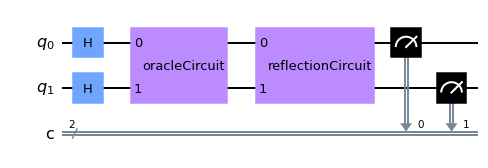

In [12]:
#Grovers Search Algorithms Implementation
#Grover's search algorithm is a quantum algorithm that can be used to search an unstructured database 
#with N items in O(√N) time, which is a quadratic speedup over classical search algorithms. 
#In Qiskit, it is implemented by constructing a quantum circuit that applies the Grover iterate 
#operation to an initial state and then measuring the output state to determine the location of 
#the target item in the database.
oracleCircuit = QuantumCircuit(2,name='oracleCircuit')
oracleCircuit.cz(0,1)
oracleCircuit.to_gate()

reflectionCircuit = QuantumCircuit(2,name="reflectionCircuit")
reflectionCircuit.h([0,1])
reflectionCircuit.z([0,1])
reflectionCircuit.cz(0,1)
reflectionCircuit.h([0,1])
reflectionCircuit.to_gate()

mainCircuit = QuantumCircuit(2,2)
mainCircuit.h([0,1])
mainCircuit.append(oracleCircuit,[0,1])
mainCircuit.append(reflectionCircuit,[0,1])
mainCircuit.measure([0,1],[0,1])
mainCircuit.draw(output='mpl')

In [13]:
simulator = Aer.get_backend("qasm_simulator") 
result = execute(mainCircuit, backend=simulator, shots = 1).result().get_counts(mainCircuit)
print(list(result.keys())[0])

11


In [14]:
#Real World Applications

In [17]:
#SEARCH ALGORITHM FOR DIFFERENT POSSIBILITIES
#You want to have a dinner party, and can invite 4 people : James, Kirk, Lars, &
#Rob but under following condition:
#(James AND Lars) OR (Kirk AND Rob)) AND NOT (Lars AND Rob)
#What are possible combinations?

#Using Grovers Algorithm
oracle = PhaseOracle('((James & Lars) | (Kirk & Rob)) & ~(Lars & Rob)')
problem = AmplificationProblem(oracle=oracle, is_good_state=oracle.evaluate_bitstring)
backend = Aer.get_backend('qasm_simulator')
grover = Grover(quantum_instance=backend)
result = grover.amplify(problem)
print("Results by Quantum Computer : ")
print(result.circuit_results[0].keys())

#Converting results into readable format
print("Results in Readable format : ")
list = ["James","Kirk","Lars","Rob"]
for num in result.circuit_results[0]:
    temp = []
    for i in range(len(num)):
        if num[i] == "1":
            temp.append(list[i])
    print(temp)

Results by Quantum Computer : 
dict_keys(['0011', '0111', '1100', '1101'])
Results in Readable format : 
['Lars', 'Rob']
['Kirk', 'Lars', 'Rob']
['James', 'Kirk']
['James', 'Kirk', 'Rob']


In [ ]:
#RSA DECRYPTION WITH QUANTUM ALGORITHMS
#Given N and a of an RSA Key, find the prime factors
#of N to decrypt

n = int(input("Enter N (odd integer than 1): "))
a = int(input("Enter a (greater than 2, with gcd(N,a) = 1 : "))

#Using Grovers Algorithm
qinstance = Aer.get_backend('qasm_simulator')
shor = Shor(quantum_instance=qinstance)

result = shor.factor(N=n, a=a)
print('Factors:', result.factors)

Enter N (odd integer than 1):  15
Enter a (greater than 2, with gcd(N,a) = 1 :  7


/tmp/ipykernel_181/2820995337.py:10: DeprecationWarning: The Shor class is deprecated as of Qiskit Terra 0.22.0 and will be removed
        no sooner than 3 months after the release date.
        It is replaced by the tutorial at https://qiskit.org/textbook/ch-algorithms/shor.html
        
  shor = Shor(quantum_instance=qinstance)
